In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Dimensiones:")
print("x_train:", x_train.shape)
print("x_test: ", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Dimensiones:
x_train: (60000, 28, 28)
x_test:  (10000, 28, 28)


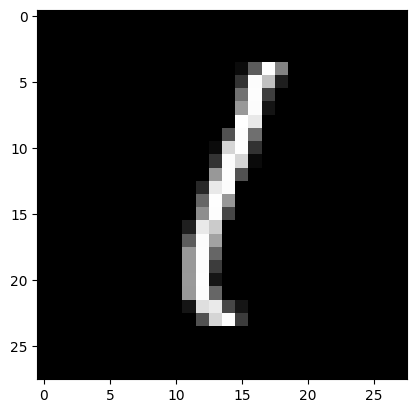

In [5]:
indice = 2356
imagen = x_train[indice]
plt.imshow(imagen,cmap='gray')
plt.show()


In [6]:
x_train = x_train / 255.0
x_test  = x_test / 255.0

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # convertir 28x28 a un vector de 784
    keras.layers.Dense(128, activation='relu'),  # capa oculta
    keras.layers.Dense(10, activation='softmax') # capa de salida (10 clases)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
print("\nEntrenando la red...\n")
history = model.fit(x_train, y_train, epochs=20, validation_split=0.1)


Entrenando la red...

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9832 - loss: 0.0613 - val_accuracy: 0.9738 - val_loss: 0.0946
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9865 - loss: 0.0460 - val_accuracy: 0.9788 - val_loss: 0.0757
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9896 - loss: 0.0360 - val_accuracy: 0.9770 - val_loss: 0.0798
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9918 - loss: 0.0273 - val_accuracy: 0.9780 - val_loss: 0.0779
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9928 - loss: 0.0228 - val_accuracy: 0.9772 - val_loss: 0.0847
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9952 - loss: 0.0176 - val_accuracy: 0.9807 - val_loss: 0.0786
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9955 - loss: 0.0149 - val_accuracy: 0.9740 - val_loss: 0.0938
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0

In [11]:
print("\nEvaluando en test...")
loss, acc = model.evaluate(x_test, y_test)
print(f"Accuracy en test: {acc:.4f}")


Evaluando en test...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.1427
Accuracy en test: 0.9768


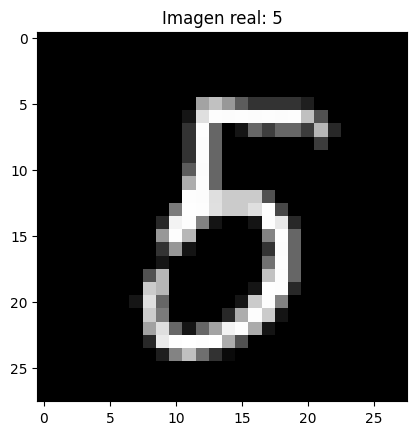

In [12]:
indice = 45
imagen = x_test[indice]
plt.imshow(imagen, cmap='gray')
plt.title("Imagen real: " + str(y_test[indice]))
plt.show()


In [13]:
prediccion = model.predict(imagen.reshape(1, 28, 28))
print("Predicción del modelo:", np.argmax(prediccion))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicción del modelo: 5
